Saving exercise_angles.csv to exercise_angles (3).csv
Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31033 entries, 0 to 31032
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Side                   31033 non-null  object 
 1   Shoulder_Angle         31033 non-null  float64
 2   Elbow_Angle            31033 non-null  float64
 3   Hip_Angle              31033 non-null  float64
 4   Knee_Angle             31033 non-null  float64
 5   Ankle_Angle            31033 non-null  float64
 6   Shoulder_Ground_Angle  31033 non-null  float64
 7   Elbow_Ground_Angle     31033 non-null  float64
 8   Hip_Ground_Angle       31033 non-null  float64
 9   Knee_Ground_Angle      31033 non-null  float64
 10  Ankle_Ground_Angle     31033 non-null  float64
 11  Label                  31033 non-null  object 
dtypes: float64(10), object(2)
memory usage: 2.8+ MB
None

First 5 Rows of the Dataset:


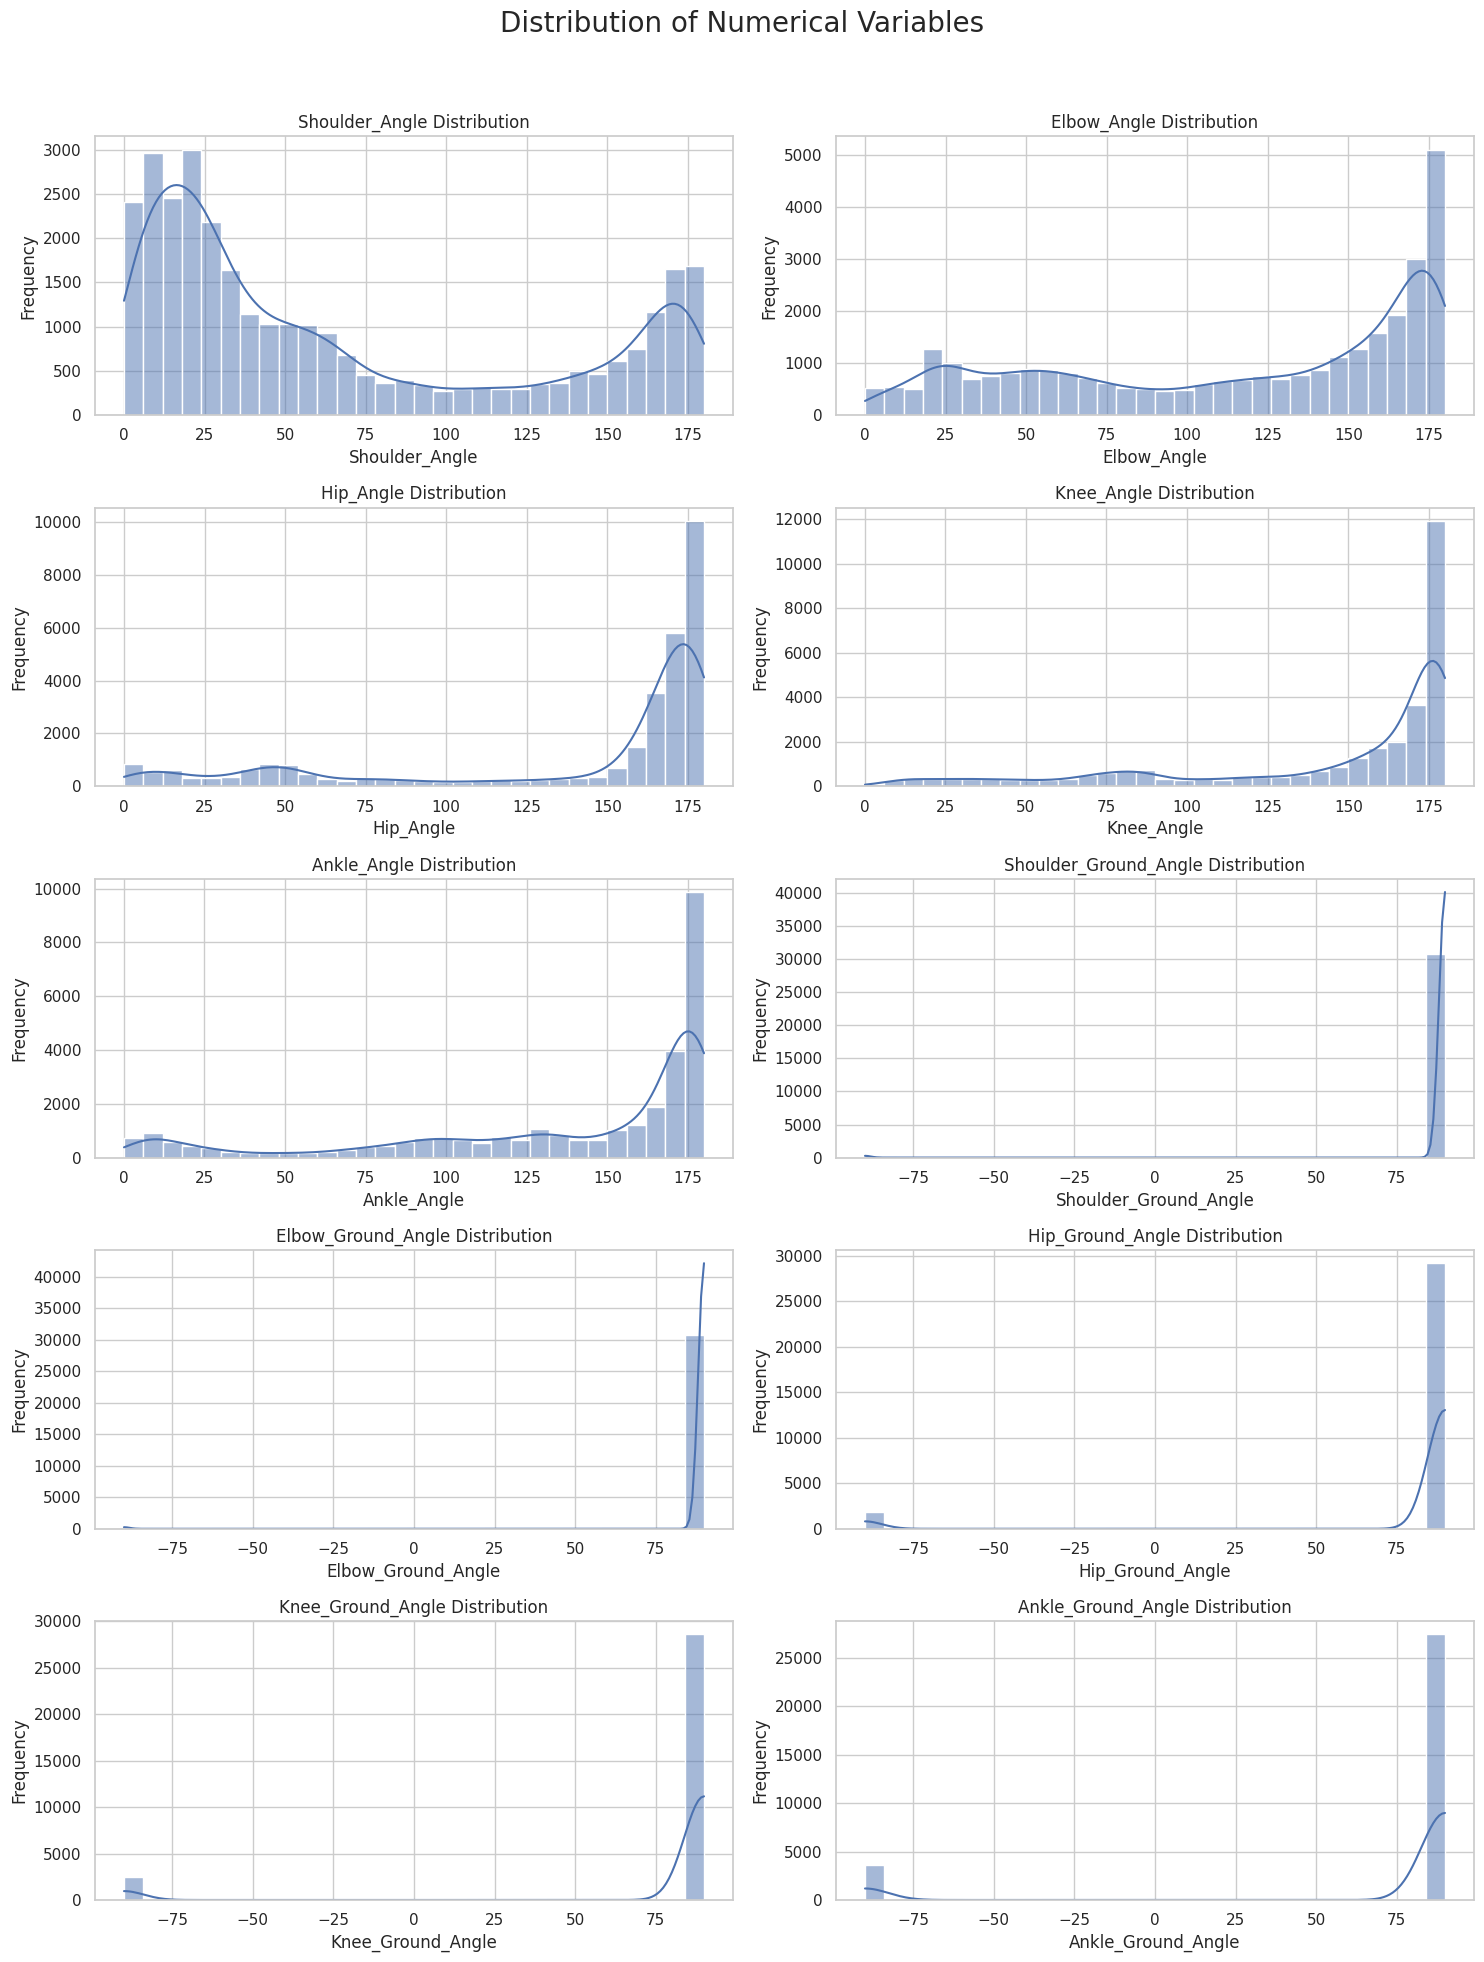

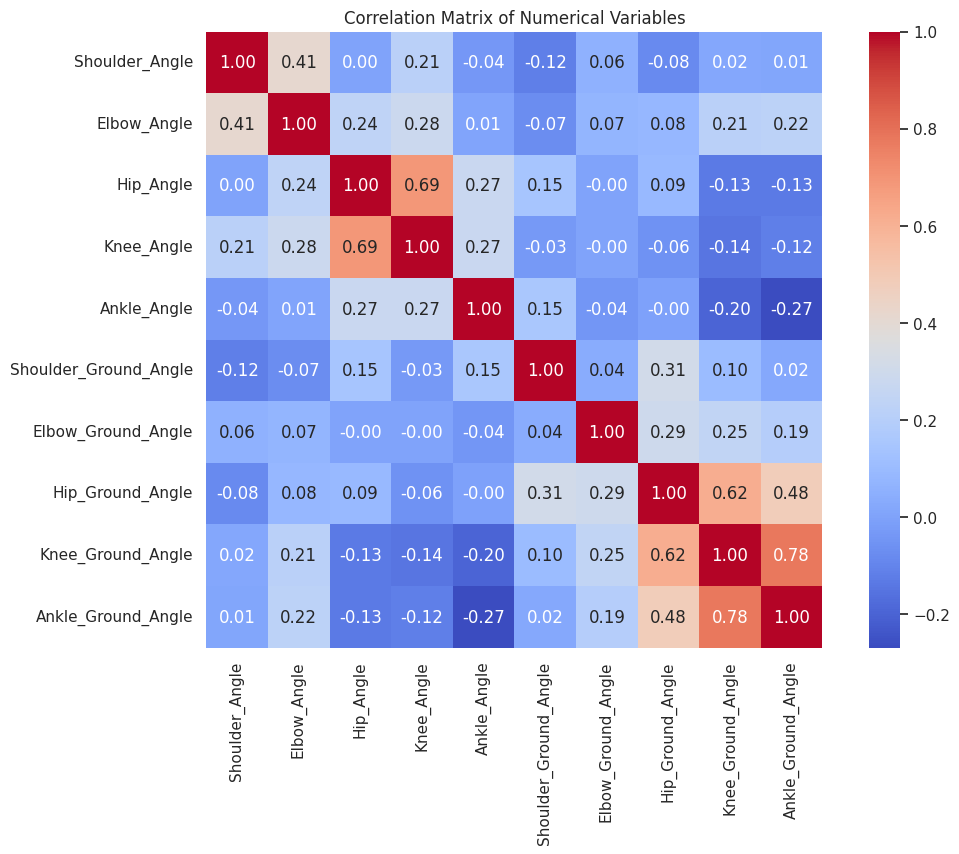

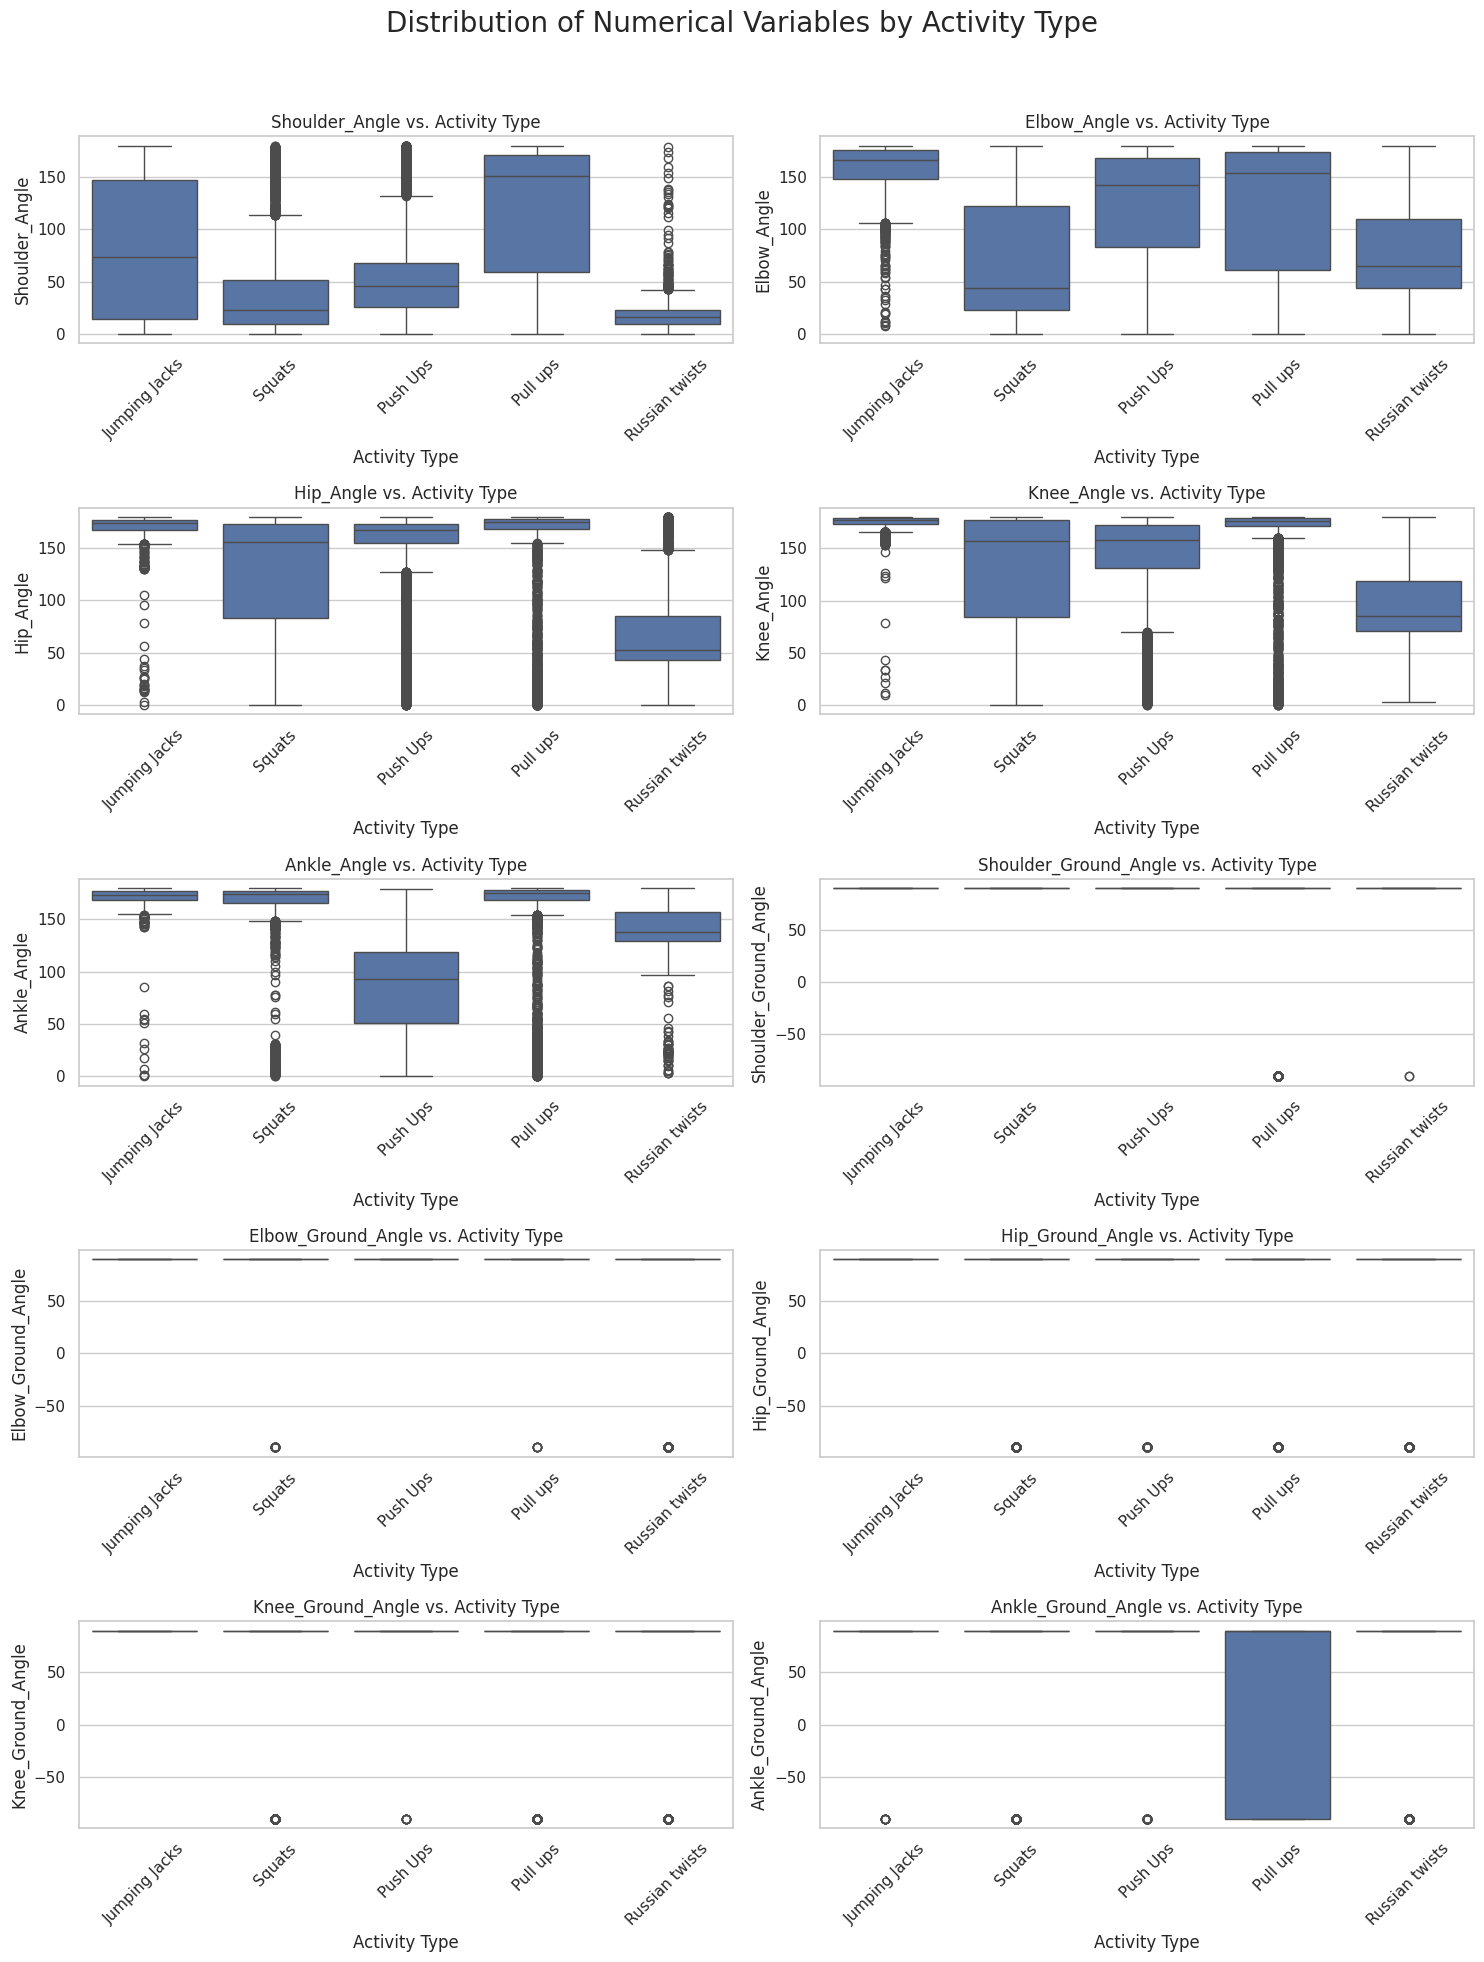

In [5]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the visualization
sns.set(style="whitegrid")

# Load the dataset
from google.colab import files
uploaded = files.upload()  # Upload the dataset file from your local system

# Replace 'exercise_angles.csv' with the name of your uploaded file
data = pd.read_csv("exercise_angles.csv")

# Display basic information about the dataset
print("Dataset Information:")
print(data.info())

# Show the first few rows to understand the structure
print("\nFirst 5 Rows of the Dataset:")
print(data.head())

# Univariate Analysis
# Calculate summary statistics for numerical columns
numerical_summary = data.describe()
print("\nSummary Statistics of Numerical Variables:")
print(numerical_summary)

# Frequency count for categorical columns
print("\nFrequency Count of Categorical Variables:")
print("Activity Type (Label):")
print(data['Label'].value_counts())
print("\nSide:")
print(data['Side'].value_counts())

# Plot histograms for numerical columns
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
fig.suptitle('Distribution of Numerical Variables', fontsize=20)

numerical_columns = data.select_dtypes(include='float64').columns

for i, col in enumerate(numerical_columns):
    sns.histplot(data[col], bins=30, kde=True, ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f'{col} Distribution')
    axes[i // 2, i % 2].set_xlabel(col)
    axes[i // 2, i % 2].set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Multivariate Analysis
# 1. Correlation Matrix for Numerical Variables
# Select only numerical columns for correlation analysis
numerical_data = data.select_dtypes(include='float64')

corr_matrix = numerical_data.corr()

# Plotting the Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar=True)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

# 2. Boxplot to show the distribution of each numerical variable grouped by activity type (Label)
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
fig.suptitle('Distribution of Numerical Variables by Activity Type', fontsize=20)

for i, col in enumerate(numerical_columns):
    sns.boxplot(x='Label', y=col, data=data, ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f'{col} vs. Activity Type')
    axes[i // 2, i % 2].set_xlabel('Activity Type')
    axes[i // 2, i % 2].set_ylabel(col)
    axes[i // 2, i % 2].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()